## Cluster Based Analysis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from salishsea_tools import viz_tools

%matplotlib inline

### Load in matched data from Elise

In [4]:
df = pickle.load(open('/data/eolson/results/MEOPAR/clusterGroups/DFODataModelClusterBIO_1905temp.pkl', 'rb'))

In [5]:
df

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Chlorophyll_Extracted,Chlorophyll_Extracted_units,...,mod_flagellates,mod_vosaline,mod_votemper,k,YD,l10_obsChl,l10_modChl,mod_Chl,Chl,Cluster
0,2015,2.0,11.0,5.296111,48.613333,-123.243833,1.6,NaN,NaN,None,...,0.205363,29.402084,9.036207,1,42,NaN,-0.254560,0.555468,NaN,1.0
1,2015,2.0,11.0,5.296111,48.613333,-123.243833,6.2,NaN,NaN,None,...,0.193040,29.563334,9.029791,6,42,NaN,-0.283513,0.519580,NaN,1.0
2,2015,2.0,11.0,5.296111,48.613333,-123.243833,6.2,NaN,NaN,None,...,0.193040,29.563334,9.029791,6,42,NaN,-0.283513,0.519580,NaN,1.0
3,2015,2.0,11.0,5.296111,48.613333,-123.243833,6.2,NaN,NaN,None,...,0.193040,29.563334,9.029791,6,42,NaN,-0.283513,0.519580,NaN,1.0
4,2015,2.0,11.0,5.296111,48.613333,-123.243833,11.4,NaN,NaN,None,...,0.181785,29.692394,9.038923,11,42,NaN,-0.309512,0.489330,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6872,2019,5.0,23.0,20.048889,49.466667,-124.499833,20.1,19.9,1.76,mg/m^3,...,0.058115,30.008827,9.788443,18,143,0.245759,-0.177596,0.663361,1.76,3.0
6873,2019,5.0,23.0,22.450833,49.726000,-124.678000,2.3,2.3,0.89,mg/m^3,...,0.206861,28.466644,12.955822,2,143,-0.050122,0.279065,1.900363,0.89,4.0
6874,2019,5.0,23.0,22.450833,49.726000,-124.678000,5.2,5.1,1.63,mg/m^3,...,0.202035,28.936111,12.314507,5,143,0.212454,0.301283,2.000165,1.63,4.0
6875,2019,5.0,23.0,22.450833,49.726000,-124.678000,9.9,9.8,1.59,mg/m^3,...,0.183607,29.409069,11.232572,9,143,0.201670,0.263062,1.831577,1.59,4.0


In [6]:
df.keys()

Index(['Year', 'Month', 'Day', 'Hour', 'Lat', 'Lon', 'Pressure', 'Depth',
       'Chlorophyll_Extracted', 'Chlorophyll_Extracted_units', 'N', 'Si',
       'Silicate_units', 'AbsSal', 'ConsT', 'Z', 'dtUTC', 'j', 'i',
       'mod_nitrate', 'mod_silicon', 'mod_ammonium', 'mod_diatoms',
       'mod_ciliates', 'mod_flagellates', 'mod_vosaline', 'mod_votemper', 'k',
       'YD', 'l10_obsChl', 'l10_modChl', 'mod_Chl', 'Chl', 'Cluster'],
      dtype='object')

In [7]:
# Set Datetime as Index
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df = df.set_index('datetime')

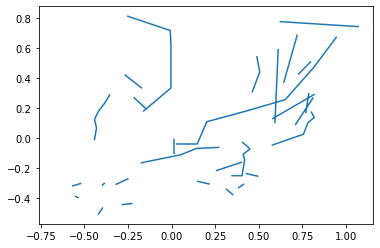

In [8]:
# Quick Look
plt.plot(df.l10_obsChl[df.Cluster==1], df.l10_modChl[df.Cluster==1])

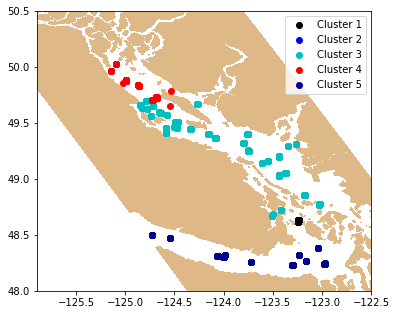

In [9]:
# plot matched data locations
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords='map')
ax.plot(df.Lon[df.Cluster==1], df.Lat[df.Cluster==1], 'ko', label='Cluster 1')
ax.plot(df.Lon[df.Cluster==2], df.Lat[df.Cluster==2], 'bo', label='Cluster 2')
ax.plot(df.Lon[df.Cluster==3], df.Lat[df.Cluster==3], 'co', label='Cluster 3')
ax.plot(df.Lon[df.Cluster==4], df.Lat[df.Cluster==4], 'ro', label='Cluster 4')
ax.plot(df.Lon[df.Cluster==5], df.Lat[df.Cluster==5], 'o', color='darkblue', label='Cluster 5')
bathy = '/home/sallen/MEOPAR/grid/bathymetry_201702.nc'
viz_tools.plot_land_mask(ax, bathy, coords='map', color='burlywood')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.9, -122.5);

In [10]:
# Look at various means
print (df.Chl[df.Cluster==3].mean())
print (df.Chl[df.Cluster==4].mean())
print (df.mod_Chl[df.Cluster==3].mean(), np.log10(0.001 + df.mod_Chl[df.Cluster==3].mean()))
print (df.mod_Chl[df.Cluster==4].mean())

2.6183257918552063
2.2859915611814356
0.8267843720784006 -0.0820827769980537
0.7298710947368157


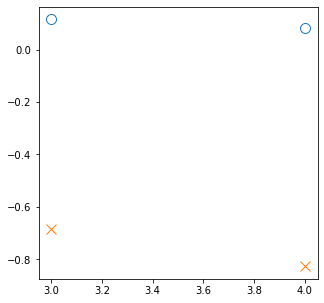

In [11]:
# Mean plot, not very convincing
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot([3, 4], [df.l10_obsChl[df.Cluster==3].mean(), df.l10_obsChl[df.Cluster==4].mean()], marker='o', markersize=10, fillstyle='none',
       linewidth=0, label='Observations')
ax.plot([3, 4], [df.l10_modChl[df.Cluster==3].mean(), df.l10_modChl[df.Cluster==4].mean()], marker='x', markersize=10, fillstyle='none',
       linewidth=0, label='Model');

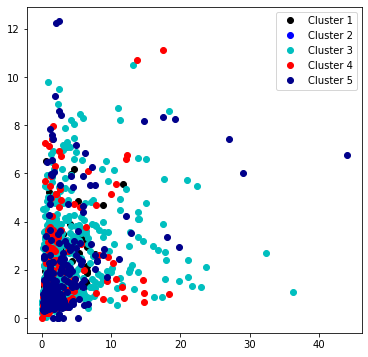

In [12]:
# plot matched data locations
fig, ax = plt.subplots(figsize = (6, 6))

ax.plot(df.Chl[df.Cluster==1], df.mod_Chl[df.Cluster==1], 'ko', label='Cluster 1')
ax.plot(df.Chl[df.Cluster==2], df.mod_Chl[df.Cluster==2], 'bo', label='Cluster 2')
ax.plot(df.Chl[df.Cluster==3], df.mod_Chl[df.Cluster==3], 'co', label='Cluster 3')
ax.plot(df.Chl[df.Cluster==4], df.mod_Chl[df.Cluster==4], 'ro', label='Cluster 4')
ax.plot(df.Chl[df.Cluster==5], df.mod_Chl[df.Cluster==5], 'o', color='darkblue', label='Cluster 5')
ax.legend();

In [13]:
def logt(x):
    return np.log10(0.001 + x)

In [14]:
logt(0.1)

-0.9956786262173574

298


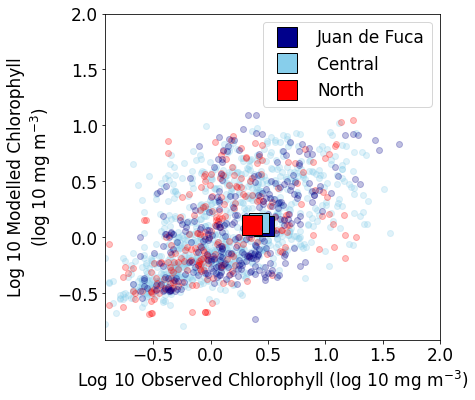

In [17]:
# plot matched data locations
plt.rcParams['font.size'] = 17
fig, ax = plt.subplots(figsize = (6, 6))

alpha = 0.25
lim= 0.12
marksize = 20
#ax.plot(df.l10_obsChl[df.Cluster==1], df.l10_modChl[df.Cluster==1], 'ko', label='Cluster 1')
#ax.plot(df.l10_obsChl[df.Cluster==2], df.l10_modChl[df.Cluster==2], 'bo', label='Cluster 2')
ax.plot(df.l10_obsChl[df.Cluster==3], df.l10_modChl[df.Cluster==3], 'o', color='skyblue', alpha=alpha)
ax.plot(df.l10_obsChl[df.Cluster==4], df.l10_modChl[df.Cluster==4], 'ro', alpha=alpha)
ax.plot(df.l10_obsChl[df.Cluster==5], df.l10_modChl[df.Cluster==5], 'o', color='darkblue', alpha=alpha)

ax.set_ylim(logt(lim), 2);
ax.set_xlim(logt(lim), 2)

print (df.Chl[(df.Cluster==5) & (df.Chl>lim)].count())
estimate = (df.Chl[(df.Cluster==5) & (df.Chl>lim)].std()/np.sqrt(298))
#ax.plot(logt(df.Chl[(df.Cluster==5) & (df.Chl>lim)].mean()+estimate), 1.5, 'gx')
#ax.plot(logt(df.Chl[(df.Cluster==5) & (df.Chl>lim)].mean()-estimate), 1.5, 'gx')
ax.plot([logt(df.Chl[(df.Cluster==5) & (df.Chl>lim)].mean()), 
        ], 
        [logt(df.mod_Chl[(df.Cluster==5) & (df.mod_Chl>lim)].mean()), 
        ], 
        marker='s', markersize=marksize, markeredgecolor='k', 
       linewidth=0, color='darkblue', label='Juan de Fuca');
ax.plot([logt(df.Chl[(df.Cluster==3) & (df.Chl>lim)].mean()), ], 
        [logt(df.mod_Chl[(df.Cluster==3) & (df.mod_Chl>lim)].mean()), ], 
        marker='s', markersize=marksize, markeredgecolor='k',
       linewidth=0, color='skyblue', label='Central');
ax.plot([logt(df.Chl[(df.Cluster==4) & (df.Chl>lim)].mean()), 
        ], 
        [logt(df.mod_Chl[(df.Cluster==4) & (df.mod_Chl>lim)].mean()), 
        ], 
        marker='s', markersize=marksize, markeredgecolor='k', 
       linewidth=0, color='r', label='North');

ax.set_xlabel('Log 10 Observed Chlorophyll (log 10 mg m$^{-3}$)')
ax.set_ylabel('Log 10 Modelled Chlorophyll\n(log 10 mg m$^{-3}$)')
ax.legend();
plt.savefig('cluster_chl.png', bbox_inches='tight')

0.9708490105536048

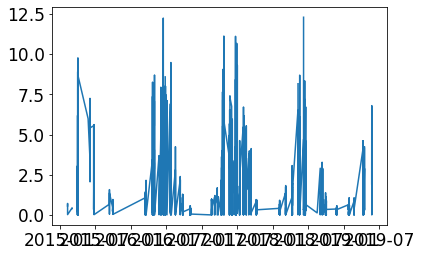

In [17]:
plt.plot(df.mod_Chl)
df.mod_Chl.mean()

In [18]:
df['mod_Chl'][df['mod_Chl'] == 0] = np.nan
np.nanmean(df.mod_Chl)

<ipython-input-18-942dc9747865>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mod_Chl'][df['mod_Chl'] == 0] = np.nan


0.9708490105536038